In [80]:
from model import *
from linares_plot import * 
from scipy.stats import norm

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


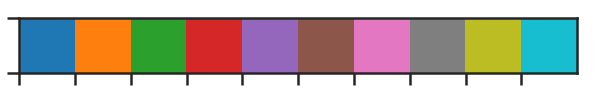

In [81]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+50) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_xlabel('time');

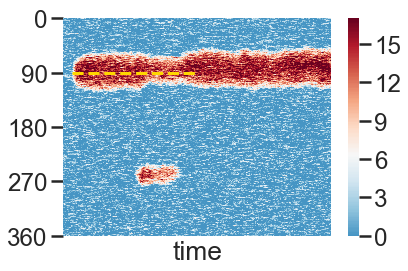

In [238]:
fee=1
fei=1
fie=1
fii=1

## Example
on = model(totalTime=3000, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.40, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


hemap(on)

In [239]:
on[1]

7.28

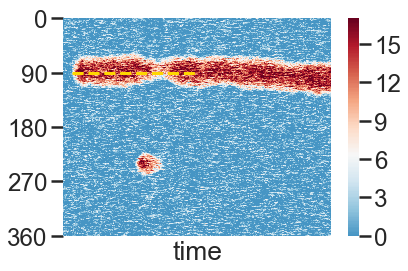

In [242]:
## Example
off = model(totalTime=3000, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=-2.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.40, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


hemap(off)

In [243]:
off[1]

-8.34

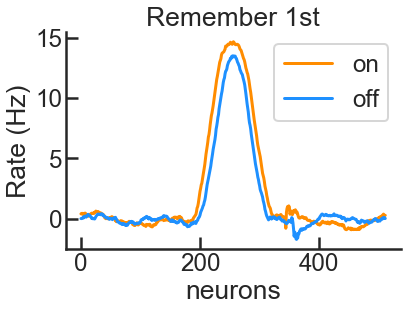

In [229]:
PA_on = pd.DataFrame(on[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)


PA_off = pd.DataFrame(off[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


plt.plot(PA_on_rolled, color=c_on,  label='on' )
plt.plot(PA_off_rolled, color= c_off, label='off' )
plt.legend()
plt.title('Remember 1st')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('Rate (Hz)')
plt.xlabel('neurons');
#plt.ylim(-2,15);

In [85]:
n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

results_on = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


In [87]:
n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

results_off = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=-2, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


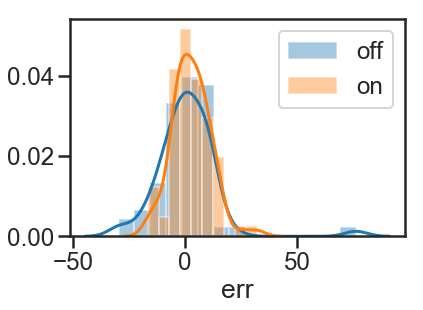

No handles with labels found to put in legend.


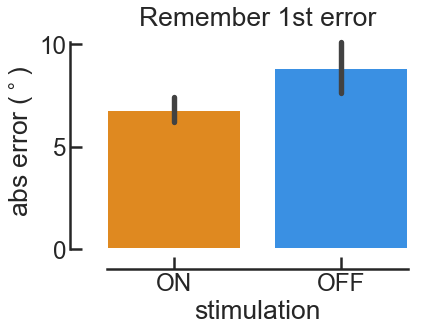

In [162]:
err_off = pd.DataFrame([results_off[i][1] for i in range(len(results_off))])
err_off.columns=['err']
err_off['abs_err']=abs(err_off['err'])
err_off['stimulation']='OFF'
err_off['distance']='far'

#err_off_RO  =err_off.loc[err_off['abs_err']< err_off['abs_err'].mean() + 1*err_off['abs_err'].std()   ]
err_off_RO  =err_off.loc[err_off['abs_err']< 90   ]

#plt.hist(err_off_RO['err'])
sns.distplot(err_off_RO['err'], label='off')



err_on = pd.DataFrame([results_on[i][1] for i in range(len(results_on))])
err_on.columns=['err']
err_on['abs_err']=abs(err_on['err'])
err_on['stimulation']='ON'
err_on['distance']='far'

#err_on_RO  =err_on.loc[err_on['abs_err']< err_on['abs_err'].mean() + 1*err_on['abs_err'].std()   ]
err_on_RO  =err_on.loc[err_on['abs_err']< 90   ]

#plt.hist(err_on_RO['err'])
sns.distplot(err_on_RO['err'], label='on')



plt.legend()
plt.show()

#plt.xlim(-20, 20)

df_tries=pd.concat([err_off_RO, err_on_RO])


sns.barplot(x='stimulation', y='abs_err',order=['ON', 'OFF'], 
            palette = onoff_pal, ci=69, data=df_tries)
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 1st error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()


In [88]:
fee=1
fei=1
fie=1
fii=1

n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

results_on_c = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=50, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


In [89]:
fee=1
fei=1
fie=1
fii=1

n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

results_off_c = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=50, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


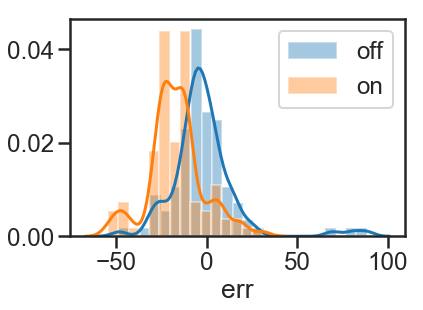

No handles with labels found to put in legend.


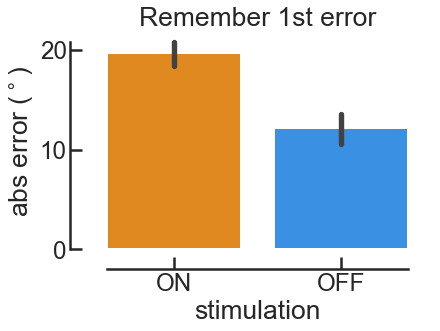

In [161]:
err_off_c = pd.DataFrame([results_off_c[i][1] for i in range(len(results_off_c))])
err_off_c.columns=['err']
err_off_c['abs_err']=abs(err_off_c['err'])
err_off_c['stimulation']='OFF'
err_off_c['distance']='close'

#err_off_RO  =err_off.loc[err_off['abs_err']< err_off['abs_err'].mean() + 1*err_off['abs_err'].std()   ]
err_off_RO_c  =err_off_c.loc[err_off_c['abs_err']< 90   ]

#plt.hist(err_off_RO['err'])
sns.distplot(err_off_RO_c['err'], label='off')



err_on_c = pd.DataFrame([results_on_c[i][1] for i in range(len(results_on_c))])
err_on_c.columns=['err']
err_on_c['abs_err']=abs(err_on_c['err'])
err_on_c['stimulation']='ON'
err_on_c['distance']='close'


#err_on_RO  =err_on.loc[err_on['abs_err']< err_on['abs_err'].mean() + 1*err_on['abs_err'].std()   ]
err_on_RO_c  =err_on_c.loc[err_on_c['abs_err']< 90   ]

#plt.hist(err_on_RO['err'])
sns.distplot(err_on_RO_c['err'], label='on')



plt.legend()
plt.show()

#plt.xlim(-20, 20)

df_tries_c=pd.concat([err_off_RO_c, err_on_RO_c])


sns.barplot(x='stimulation', y='abs_err',order=['ON', 'OFF'], 
            palette = onoff_pal, ci=69, data=df_tries_c)
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 1st error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()


In [176]:
df_tot=pd.concat([df_tries, df_tries_c])
df_tot['performance']=df_tot['abs_err']<25

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


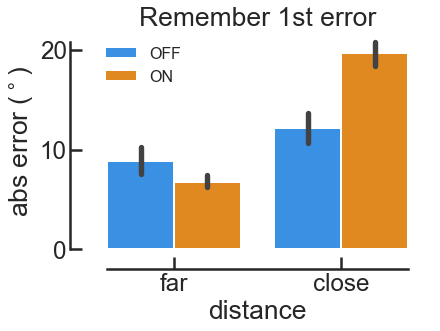

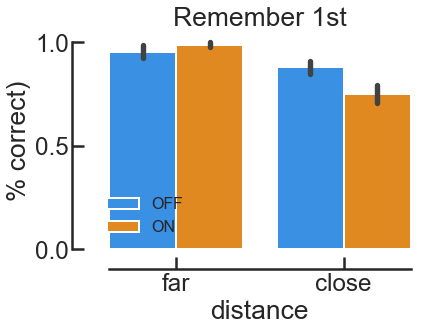

In [180]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df_tot)
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 1st error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()



sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df_tot)
plt.ylabel(r'% correct)')
plt.title('Remember 1st')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()


In [ ]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

In [ ]:
fee=0.97
fei=0.98
fie=1.06
fii=1.04

In [ ]:
fee=0.98
fei=0.97
fie=1.05
fii=1.11


In [ ]:
fee=0.92
fei=0.94
fie=0.96
fii=1.04

In [ ]:
fee=0.93
fei=0.94
fie=0.96
fii=1.04

In [ ]:
fee=0.945
fei=0.925
fie=0.985
fii=1.035

In [ ]:
fee=0.930
fei=0.920
fie=0.989
fii=1.039


In [ ]:
fee=0.9
fei=0.91

fie=0.97
fii=1.1

11.03

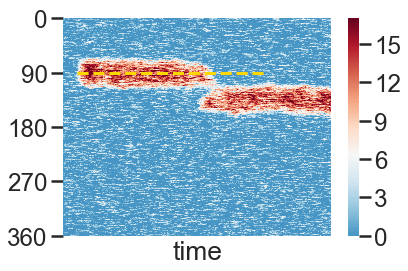

In [247]:
fee=0.94
fei=0.93
fie=1.04
fii=1.07


## Example
on = model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


hemap(on)
#plt.gca().plot([stimon, nsteps], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
on[2]

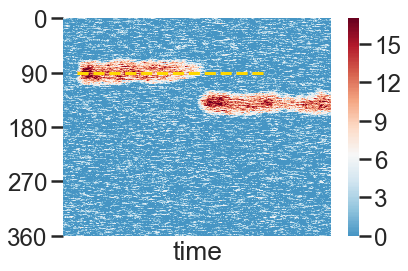

In [245]:
off = model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=50, tauE=20, tauI=10,  n_stims=2, I0E=-2.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


hemap(off)
#plt.gca().plot([stimon, nsteps], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 


In [246]:
off[2]

0.84

## Remember 1st stim and 2nd simulations

In [ ]:
n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

results_on = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


In [ ]:
n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

results_off = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=-2.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

In [ ]:
lim=90

err_off_f = pd.DataFrame([results_off[i][1] for i in range(len(results_off))])
err_off_f.columns=['err']
err_off_f['abs_err']=abs(err_off_f['err'])
err_off_f['stimulation']='OFF'
err_off_f['distance']='far'
#err_off_RO_f  =err_off_f.loc[err_off_f['abs_err']< err_off_f['abs_err'].mean() + 2*err_off_f['abs_err'].std()   ]
err_off_RO_f  =err_off_f.loc[err_off_f['abs_err']< lim   ]


err_on_f = pd.DataFrame([results_on[i][1] for i in range(len(results_on))])
err_on_f.columns=['err']
err_on_f['abs_err']=abs(err_on_f['err'])
err_on_f['stimulation']='ON'
err_on_f['distance']='far'
#err_on_RO_f  =err_on_f.loc[err_on_f['abs_err']< err_on_f['abs_err'].mean() + 2*err_on_f['abs_err'].std()   ]
err_on_RO_f  =err_on_f.loc[err_on_f['abs_err']< lim ]



In [ ]:
err_off_RO_f.abs_err.mean() ##bigger!


In [ ]:
err_on_RO_f.abs_err.mean() ##bigger!


In [ ]:
sns.distplot(err_off_RO_f.err)
sns.distplot(err_on_RO_f.err)


In [ ]:
I0E:0.1 I0E:-3.5 noise:8. sep:50

In [100]:
fee=1
fei=1
fie=1
fii=1

n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

results_on_c = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


In [101]:
fee=1
fei=1
fie=1
fii=1

n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

results_off_c = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=-2, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


In [102]:
n_simuls=100
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

fee=0.94
fei=0.93
fie=1.04
fii=1.07


results2_off_c = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=-2, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.40, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


In [103]:
fee=0.94
fei=0.93
fie=1.04
fii=1.07

results2_off_f = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=-2, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.40, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

In [104]:
fee=0.94
fei=0.93
fie=1.04
fii=1.07

results2_on_c = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.40, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

In [105]:
fee=0.94
fei=0.93
fie=1.04
fii=1.07

results2_on_f = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.40, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

In [160]:
lim=360

results_off_c  
results_on_c  
results_off  
results_on  

In [161]:
err_off_c = pd.DataFrame([results_off_c[i][1] for i in range(len(results_off_c))])
err_off_c.columns=['err']
err_off_c['abs_err']=abs(err_off_c['err'])
err_off_c['stimulation']='OFF'
err_off_c['distance']='close'
#err_off_RO_c  =err_off_c.loc[err_off_c['abs_err']< err_off_c['abs_err'].mean() + 2*err_off_c['abs_err'].std()   ]
err_off_RO_c  =err_off_c.loc[err_off_c['abs_err']< lim   ]

In [162]:
err_on_c = pd.DataFrame([results_on_c[i][1] for i in range(len(results_on_c))])
err_on_c.columns=['err']
err_on_c['abs_err']=abs(err_on_c['err'])
err_on_c['stimulation']='ON'
err_on_c['distance']='close'
#err_on_RO_c  =err_on_c.loc[err_on_c['abs_err']< err_on_c['abs_err'].mean() + 2*err_on_c['abs_err'].std()   ]
err_on_RO_c  =err_on_c.loc[err_on_c['abs_err']< lim   ]

In [163]:
err_off_f = pd.DataFrame([results_off[i][1] for i in range(len(results_off))])
err_off_f.columns=['err']
err_off_f['abs_err']=abs(err_off_f['err'])
err_off_f['stimulation']='OFF'
err_off_f['distance']='far'
#err_off_RO_f  =err_off_f.loc[err_off_f['abs_err']< err_off_f['abs_err'].mean() + 2*err_off_f['abs_err'].std()   ]
err_off_RO_f  =err_off_f.loc[err_off_f['abs_err']< lim   ]

In [164]:
err_on_f = pd.DataFrame([results_on[i][1] for i in range(len(results_on))])
err_on_f.columns=['err']
err_on_f['abs_err']=abs(err_on_f['err'])
err_on_f['stimulation']='ON'
err_on_f['distance']='far'
#err_on_RO_f  =err_on_f.loc[err_on_f['abs_err']< err_on_f['abs_err'].mean() + 2*err_on_f['abs_err'].std()   ]
err_on_RO_f  =err_on_f.loc[err_on_f['abs_err']< lim ]

In [165]:
first=pd.concat([err_off_RO_c, err_on_RO_c, err_off_RO_f, err_on_RO_f ], ignore_index=True)
first['order']='1st'

results2_off_c  
results2_off_f  
results2_on_c  
results2_on_f  

In [166]:
err2_off_c = pd.DataFrame([results2_off_c[i][2] for i in range(len(results2_off_c))])
err2_off_c.columns=['err']
err2_off_c['abs_err']=abs(err2_off_c['err'])
err2_off_c['stimulation']='OFF'
err2_off_c['distance']='close'
#err2_off_RO_c  =err2_off_c.loc[err2_off_c['abs_err']< err2_off_c['abs_err'].mean() + 2*err2_off_c['abs_err'].std()   ]
err2_off_RO_c  =err2_off_c.loc[err2_off_c['abs_err']< lim   ]

In [167]:
err2_on_c = pd.DataFrame([results2_on_c[i][2] for i in range(len(results2_on_c))])
err2_on_c.columns=['err']
err2_on_c['abs_err']=abs(err2_on_c['err'])
err2_on_c['stimulation']='ON'
err2_on_c['distance']='close'
#err2_on_RO_c  =err2_on_c.loc[err2_on_c['abs_err']< err2_on_c['abs_err'].mean() + 2*err_on_c['abs_err'].std()   ]
err2_on_RO_c  =err2_on_c.loc[err2_on_c['abs_err']< lim   ]

In [168]:
err2_off_f = pd.DataFrame([results2_off_f[i][2] for i in range(len(results2_off_f))])
err2_off_f.columns=['err']
err2_off_f['abs_err']=abs(err2_off_f['err'])
err2_off_f['stimulation']='OFF'
err2_off_f['distance']='far'
#err2_off_RO_f  =err2_off_f.loc[err2_off_f['abs_err']< err2_off_f['abs_err'].mean() + 2*err2_off_f['abs_err'].std()   ]
err2_off_RO_f  =err2_off_f.loc[err2_off_f['abs_err']< lim   ]

In [169]:
err2_on_f = pd.DataFrame([results2_on_f[i][2] for i in range(len(results2_on_f))])
err2_on_f.columns=['err']
err2_on_f['abs_err']=abs(err2_on_f['err'])
err2_on_f['stimulation']='ON'
err2_on_f['distance']='far'
#err2_on_RO_f  =err2_on_f.loc[err2_on_f['abs_err']< err2_on_f['abs_err'].mean() + 3*err2_on_f['abs_err'].std()   ]
err2_on_RO_f  =err2_on_f.loc[err2_on_f['abs_err']< lim]   

In [170]:
second=pd.concat([err2_off_RO_c, err2_on_RO_c, err2_off_RO_f, err2_on_RO_f ], ignore_index=True)
second['order']='2nd'

In [171]:
df__ = pd.concat([first, second], ignore_index=True)
df__['performance']=df__['abs_err']<15

In [172]:
#######df__.to_excel('I0E_res.xlsx')

In [173]:
len(df__)

800

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


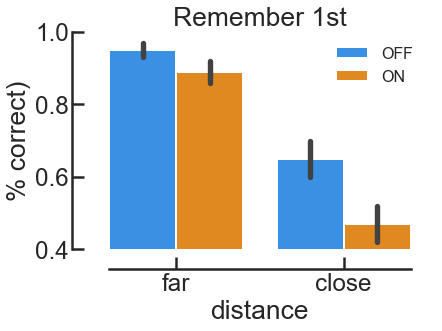

In [174]:
sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df__.loc[df__['order']=='1st'])
plt.ylabel(r'% correct)')
plt.title('Remember 1st')
plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

# sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
#             palette = offon_pal, ci=69, data=df__.loc[df__['order']=='1st'])
# plt.ylabel(r'abs error ($^\circ$)')
# plt.title('Remember 1st')
# plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# adjust_spines(plt.gca(), ['left', 'bottom'])
# plt.legend(loc='best', frameon=False, prop={'size': 16});
# plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


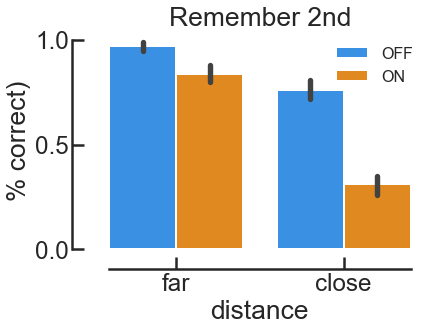

In [175]:
sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df__.loc[df__['order']=='2nd'])
plt.ylabel(r'% correct)')
plt.title('Remember 2nd')
#plt.ylim(0,0.8)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()


# sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
#             palette = offon_pal, ci=69, data=df__.loc[df__['order']=='2nd'])
# plt.title('Remember 2nd')
# plt.ylabel(r'abs error ($^\circ$)')
# plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# adjust_spines(plt.gca(), ['left', 'bottom'])
# plt.legend(loc='best', frameon=False, prop={'size': 16});
# plt.show()

In [176]:
df_tot=df__

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


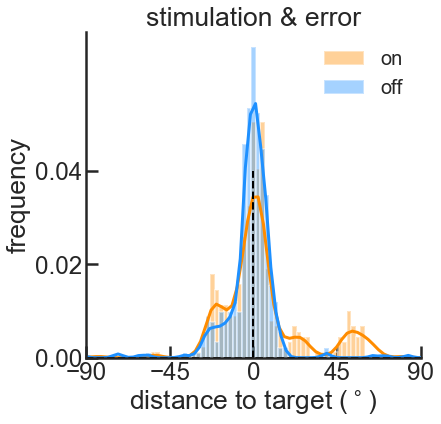

In [177]:
## fit=norm, kde=False,
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111)

plt.subplot(111)
sns.distplot(df_tot.loc[df_tot['stimulation']=='ON', 'err'] , bins=np.linspace(-60,60,50), 
              kde=True, fit_kws={"color":c_on, 'linewidth':2}, label='on', color=c_on, ax=ax)


sns.distplot(df_tot.loc[df_tot['stimulation']=='OFF', 'err'] , bins=np.linspace(-60,60,50), 
              kde=True, fit_kws={"color":c_off, 'linewidth':2}, label='off', color=c_off, ax=ax)

l = plt.legend(loc='best', frameon=False, prop={'size': 20})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.title('stimulation & error');
plt.xlim(-90,90)
plt.xticks([-90, -45, 0, 45, 90])
plt.plot([-90, 90], [0,0], 'k--', linewidth=2);
#plt.ylim(-0.002, 0.04)
plt.yticks([0, 0.02,0.04]);
plt.plot([0, 0], [0,0.04], 'k--', linewidth=2);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


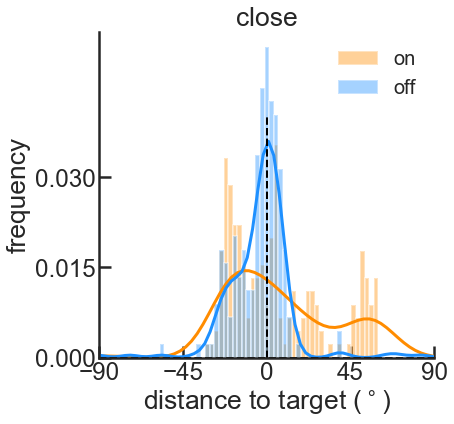

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


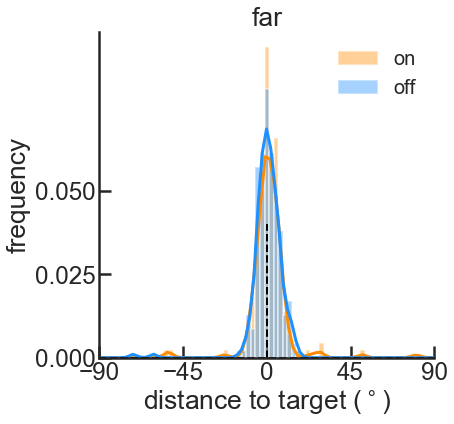

In [178]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111)

plt.subplot(111)
sns.distplot(df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='ON'), 'err'] , bins=np.linspace(-60,60,50), 
               kde=True, fit_kws={"color":c_on, 'linewidth':2}, label='on', color=c_on, ax=ax)


sns.distplot(df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='OFF'), 'err'] , bins=np.linspace(-60,60,50), 
               kde=True, fit_kws={"color":c_off, 'linewidth':2}, label='off', color=c_off, ax=ax)

l = plt.legend(loc='best', frameon=False, prop={'size': 20})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.title('close');

#plt.ylim(-0.002, 0.03)
plt.yticks([0, 0.015,0.03])
plt.xlim(-90,90)
plt.xticks([-90, -45, 0, 45, 90])
plt.plot([-90, 90], [0,0], 'k--', linewidth=2);
plt.plot([0, 0], [0,0.04], 'k--', linewidth=2);


plt.show(block=False);

f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111)

plt.subplot(111)
sns.distplot(df_tot.loc[(df_tot['distance']=='far') & (df_tot['stimulation']=='ON'), 'err'] , bins=np.linspace(-60,60,50), 
              kde=True, fit_kws={"color":c_on, 'linewidth':2}, label='on', color=c_on, ax=ax)


sns.distplot(df_tot.loc[(df_tot['distance']=='far') & (df_tot['stimulation']=='OFF'), 'err'] , bins=np.linspace(-60,60,50), 
              kde=True, fit_kws={"color":c_off, 'linewidth':2}, label='off', color=c_off, ax=ax)

l = plt.legend(loc='best', frameon=False, prop={'size': 20})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.title('far');

#plt.ylim(-0.002, 0.05)
plt.yticks([0, 0.025,0.05])

plt.xlim(-90,90)
plt.xticks([-90, -45, 0, 45, 90])
plt.plot([-90, 90], [0,0], 'k--', linewidth=2);
plt.plot([0, 0], [0,0.04], 'k--', linewidth=2);


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecatio

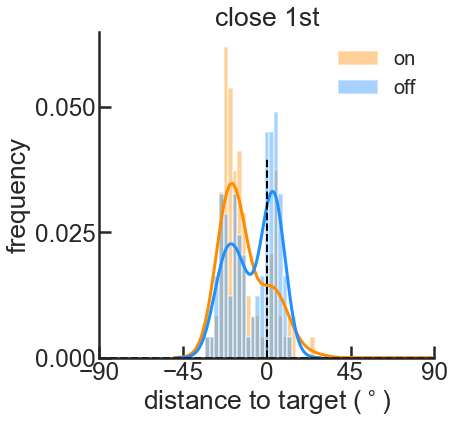

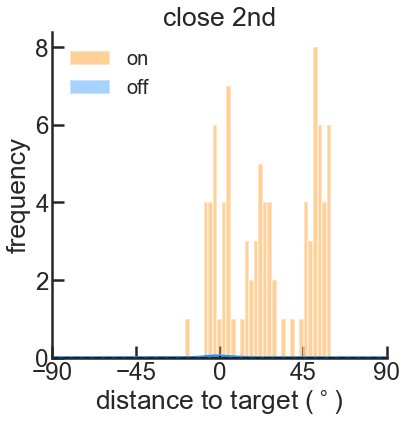

In [179]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111)

plt.subplot(111)
sns.distplot(df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='ON') & (df_tot['order']=='1st') , 'err'] , 
             bins=np.linspace(-60,60,50), kde=True, fit_kws={"color":c_on, 'linewidth':2}, 
             label='on', color=c_on, ax=ax)


sns.distplot(df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='OFF')  & (df_tot['order']=='1st'), 'err'] , 
             bins=np.linspace(-60,60,50),  kde=True, fit_kws={"color":c_off, 'linewidth':2}, 
             label='off', color=c_off, ax=ax)

l = plt.legend(loc='best', frameon=False, prop={'size': 20})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.title('close 1st');

#plt.ylim(-0.002, 0.05)
plt.yticks([0, 0.025,0.05])

plt.xlim(-90,90)
plt.xticks([-90, -45, 0, 45, 90])
plt.plot([-90, 90], [0,0], 'k--', linewidth=2);
plt.plot([0, 0], [0,0.04], 'k--', linewidth=2);



f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111)

plt.subplot(111)
sns.distplot(df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='ON') & (df_tot['order']=='2nd') , 'err'] , 
             bins=np.linspace(-60,60,50), kde=False, fit_kws={"color":c_on, 'linewidth':2}, 
             label='on', color=c_on, ax=ax)


sns.distplot(df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='OFF')  & (df_tot['order']=='2nd'), 'err'] , 
             bins=np.linspace(-60,60,50),  kde=True, fit_kws={"color":c_off, 'linewidth':2}, 
             label='off', color=c_off, ax=ax)

l = plt.legend(loc='best', frameon=False, prop={'size': 20})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.title('close 2nd');

#plt.ylim(-0.002, 0.05)
#plt.yticks([0, 0.025,0.05])

plt.xlim(-90,90)
plt.xticks([-90, -45, 0, 45, 90])
plt.plot([-90, 90], [0,0], 'k--', linewidth=2);
plt.plot([0, 0], [0,0.04], 'k--', linewidth=2);


# print( df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='ON') & (df_tot['order']=='2nd') , 'error'].median())
# print( df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='OFF') & (df_tot['order']=='2nd') , 'error'].median())


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecatio

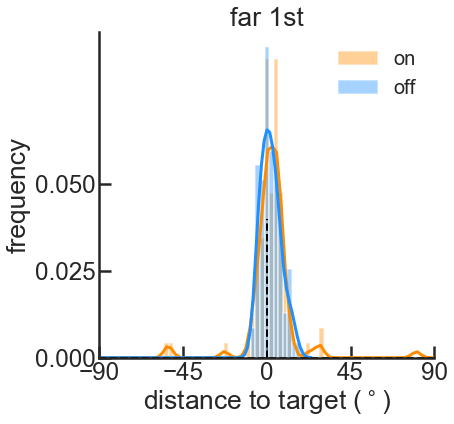

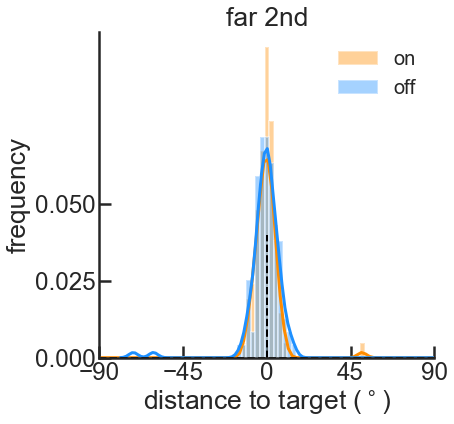

In [180]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111)

plt.subplot(111)
sns.distplot(df_tot.loc[(df_tot['distance']=='far') & (df_tot['stimulation']=='ON') & (df_tot['order']=='1st') , 'err'] , 
             bins=np.linspace(-60,60,50), kde=True, fit_kws={"color":c_on, 'linewidth':2}, 
             label='on', color=c_on, ax=ax)


sns.distplot(df_tot.loc[(df_tot['distance']=='far') & (df_tot['stimulation']=='OFF')  & (df_tot['order']=='1st'), 'err'] , 
             bins=np.linspace(-60,60,50),  kde=True, fit_kws={"color":c_off, 'linewidth':2}, 
             label='off', color=c_off, ax=ax)

l = plt.legend(loc='best', frameon=False, prop={'size': 20})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.title('far 1st');

#plt.ylim(-0.002, 0.05)
plt.yticks([0, 0.025,0.05])

plt.xlim(-90,90)
plt.xticks([-90, -45, 0, 45, 90])
plt.plot([-90, 90], [0,0], 'k--', linewidth=2);
plt.plot([0, 0], [0,0.04], 'k--', linewidth=2);



f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111)

plt.subplot(111)
sns.distplot(df_tot.loc[(df_tot['distance']=='far') & (df_tot['stimulation']=='ON') & (df_tot['order']=='2nd') , 'err'] , 
             bins=np.linspace(-60,60,50), kde=True, fit_kws={"color":c_on, 'linewidth':2}, 
             label='on', color=c_on, ax=ax)


sns.distplot(df_tot.loc[(df_tot['distance']=='far') & (df_tot['stimulation']=='OFF')  & (df_tot['order']=='2nd'), 'err'] , 
             bins=np.linspace(-60,60,50),  kde=True, fit_kws={"color":c_off, 'linewidth':2}, 
             label='off', color=c_off, ax=ax)

l = plt.legend(loc='best', frameon=False, prop={'size': 20})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(direction='in')
plt.xlabel(r'distance to target ($^\circ$)')
plt.ylabel('frequency')
plt.title('far 2nd');

#plt.ylim(-0.002, 0.05)
plt.yticks([0, 0.025,0.05])

plt.xlim(-90,90)
plt.xticks([-90, -45, 0, 45, 90])
plt.plot([-90, 90], [0,0], 'k--', linewidth=2);
plt.plot([0, 0], [0,0.04], 'k--', linewidth=2);


# print( df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='ON') & (df_tot['order']=='2nd') , 'error'].median())
# print( df_tot.loc[(df_tot['distance']=='close') & (df_tot['stimulation']=='OFF') & (df_tot['order']=='2nd') , 'error'].median())


1.53


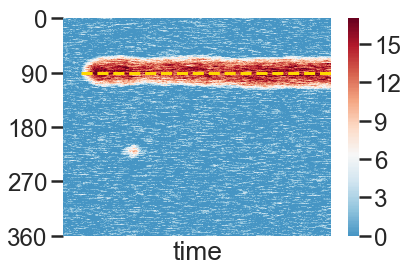

In [304]:
# 1st off close
fee=1
fei=1
fie=1
fii=1

an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=300, angle_target_i=90, presentation_period=100,
           angle_separation=130, tauE=20, tauI=10,  n_stims=2, I0E=-3., I0I=0.5, 
           GEE=0.069*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=6.1, sigI=0.1, 
           kappa_E=45, 
           kappa_I=0.4, 
           kappa_stim=40., N=512, stim_strengthE=6.7, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 
#
hemap(an)
print(an[1])


1.36


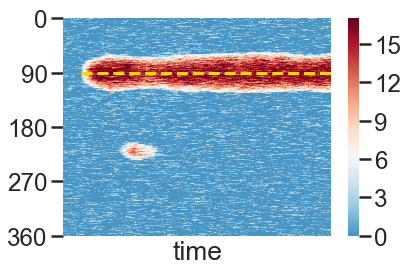

In [306]:
## Example of simulartion
an2 = model(totalTime=1500, targ_onset_1=100, targ_onset_2=300, angle_target_i=90, presentation_period=100,
           angle_separation=130, tauE=20, tauI=10,  n_stims=2, I0E=0.12, I0I=0.5, 
           GEE=0.069*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=6.1, sigI=0.1, 
           kappa_E=45, 
           kappa_I=0.4, 
           kappa_stim=40., N=512, stim_strengthE=6.7, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 
#
hemap(an2)
print(an2[1])


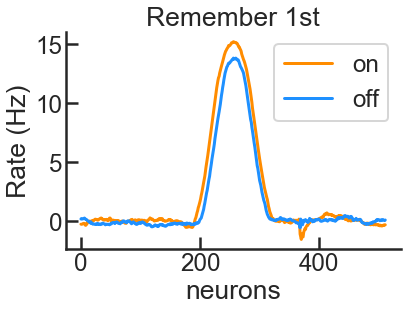

In [307]:
PA_on = pd.DataFrame(an2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)


PA_off = pd.DataFrame(an[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


plt.plot(PA_on_rolled, color=c_on,  label='on' )
plt.plot(PA_off_rolled, color= c_off, label='off' )
plt.legend()
plt.title('Remember 1st')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('Rate (Hz)')
plt.xlabel('neurons');
#plt.ylim(-2,15);


In [342]:
n_simuls=500
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

results_off = Parallel(n_jobs = numcores)(delayed(model)(totalTime=1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
           angle_separation=130, tauE=20, tauI=10,  n_stims=2, I0E=-3., I0I=0.5, 
           GEE=0.069*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=6.1, sigI=0.1, 
           kappa_E=45, 
           kappa_I=0.4, 
           kappa_stim=40., N=512, stim_strengthE=6.7, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls))

Number cores: 7


In [343]:
n_simuls=500
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

results_on = Parallel(n_jobs = numcores)(delayed(model)(totalTime=1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
           angle_separation=130, tauE=20, tauI=10,  n_stims=2, I0E=0.12, I0I=0.5, 
           GEE=0.069*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=6.1, sigI=0.1, 
           kappa_E=45, 
           kappa_I=0.4, 
           kappa_stim=40., N=512, stim_strengthE=6.7, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 

Number cores: 7


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-20, 20)

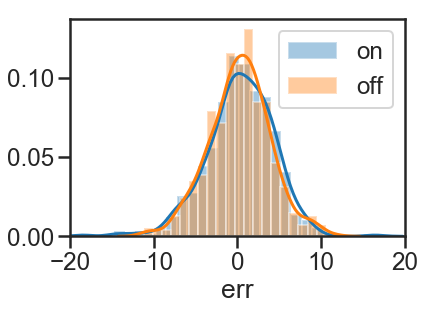

In [351]:

err_on = pd.DataFrame([results_on[i][1] for i in range(len(results_on))])
err_on.columns=['err']
err_on['abs_err']=abs(err_on['err'])

#err_on_RO  =err_on.loc[err_on['abs_err']< err_on['abs_err'].mean() + 2*err_on['abs_err'].std()   ]
err_on_RO  =err_on.loc[err_on['abs_err']< 20   ]

#plt.hist(err_on_RO['err'])
sns.distplot(err_on_RO['err'], label='on')


err_off = pd.DataFrame([results_off[i][1] for i in range(len(results_off))])
err_off.columns=['err']
err_off['abs_err']=abs(err_off['err'])

#err_off_RO  =err_off.loc[err_off['abs_err']< err_off['abs_err'].mean() + 2*err_off['abs_err'].std()   ]
err_off_RO  =err_off.loc[err_off['abs_err']< 20   ]

#plt.hist(err_off_RO['err'])
sns.distplot(err_off_RO['err'], label='off')
plt.legend()

plt.xlim(-20, 20)

In [ ]:
a = np.array([results_on[i][1] for i in range(len(results_on))])[np.array([results_on[i][1] for i in range(len(results_on))])<100] 
b= a[a>-40]
plt.hist(b)
np.mean(abs(b))

2.6886

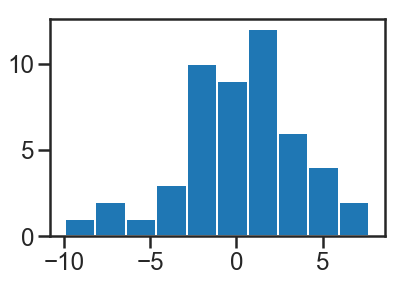

In [336]:


plt.hist(np.array([results_off[i][1] for i in range(len(results_off))]))
np.mean(abs(np.array([results_off[i][1] for i in range(len(results_off))])))

2.6497872340425532

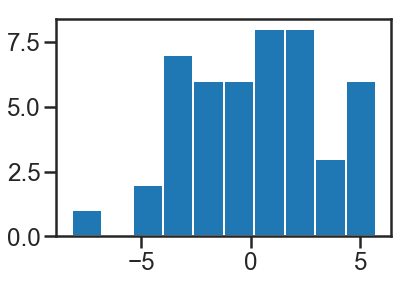

In [335]:
a = np.array([results_on[i][1] for i in range(len(results_on))])[np.array([results_on[i][1] for i in range(len(results_on))])<100] 
b= a[a>-40]
plt.hist(b)
np.mean(abs(b))

In [337]:
abs(np.array([results_on[i][1] for i in range(len(results_on))]) [abs(np.array([results_on[i][1] for i in range(len(results_on))]) ) <20] )

array([3.09, 0.06, 2.61, 2.32, 2.73, 1.95, 5.38, 0.45, 2.09, 2.94, 0.95,
       2.72, 3.99, 3.63, 4.77, 4.58, 3.96, 0.3 , 2.35, 0.35, 5.22, 2.62,
       8.19, 1.61, 5.19, 0.26, 1.87, 1.04, 1.71, 3.66, 1.92, 1.22, 5.59,
       0.99, 2.55, 2.25, 4.02, 4.11, 2.05, 0.43, 1.35, 5.54, 1.1 , 5.72,
       0.63, 1.92, 0.56])

In [338]:
abs(np.array([results_off[i][1] for i in range(len(results_off))]) [abs(np.array([results_off[i][1] for i in range(len(results_off)) ]) ) <20] )

array([1.25, 3.89, 2.62, 4.21, 7.21, 2.4 , 0.76, 4.89, 9.94, 1.22, 0.83,
       3.67, 2.36, 3.51, 0.46, 1.12, 1.6 , 3.81, 4.69, 0.81, 1.48, 1.77,
       5.86, 2.9 , 1.97, 4.85, 0.13, 0.89, 0.78, 5.99, 4.09, 1.41, 2.61,
       0.03, 7.71, 6.53, 0.57, 1.17, 5.36, 2.39, 0.59, 2.15, 3.31, 0.65,
       1.46, 0.18, 2.32, 0.28, 1.98, 1.77])

In [339]:
np.mean(abs(np.array([results_off[i][1] for i in range(len(results_off))]) [abs(np.array([results_off[i][1] for i in range(len(results_off)) ]) ) <20] ) )

2.6886

In [340]:
abs(np.array([results_on[i][1] for i in range(len(results_on))]) [abs(np.array([results_on[i][1] for i in range(len(results_on))]) ) <20] )

array([3.09, 0.06, 2.61, 2.32, 2.73, 1.95, 5.38, 0.45, 2.09, 2.94, 0.95,
       2.72, 3.99, 3.63, 4.77, 4.58, 3.96, 0.3 , 2.35, 0.35, 5.22, 2.62,
       8.19, 1.61, 5.19, 0.26, 1.87, 1.04, 1.71, 3.66, 1.92, 1.22, 5.59,
       0.99, 2.55, 2.25, 4.02, 4.11, 2.05, 0.43, 1.35, 5.54, 1.1 , 5.72,
       0.63, 1.92, 0.56])

In [341]:
np.mean(abs(np.array([results_on[i][1] for i in range(len(results_on))]) [np.array([results_on[i][1] for i in range(len(results_on))]) <20] ) )

3.829166666666666

In [224]:
np.mean(np.array([results_2[i][1] for i in range(len(results_2))]) [np.array([results_2[i][1] for i in range(len(results_2))]) <50] )

-4.527647058823529

In [221]:
[results_1[i][1] for i in range(len(results_1))]

[3.73,
 1.27,
 1.44,
 0.39,
 0.71,
 0.39,
 1.28,
 0.04,
 -1.35,
 -2.01,
 -0.14,
 1.54,
 -0.91,
 -1.67,
 -0.49,
 -1.1,
 1.04,
 0.17,
 0.75,
 0.91]

In [248]:
n_simuls=10
numcores = multiprocessing.cpu_count() -1 
print('Number cores: '+ str(numcores))

results = Parallel(n_jobs = numcores)(delayed(model)(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=51, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, #OFF
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for n in range(n_simuls)) 



Number cores: 7


In [249]:
np.mean([results[i][1] for i in range(len(results))])

-7.256

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


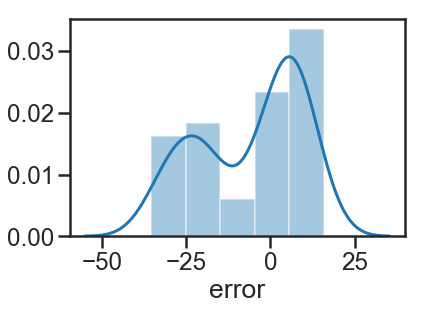

In [268]:
df_tries=pd.read_excel('tries.xlsx')
df_tries.columns=['error', 'stimulation', 'distance']
df_tries['abs_err']=abs(df_tries['error'])
df_tries['performance']=df_tries['abs_err']<20
df_tries['order']='1st'
df_tries=df_tries[df_tries['abs_err']<df_tries['abs_err'].mean() + 2*df_tries['abs_err'].std()]
sns.distplot(df_tries.loc[df_tries['stimulation']=='ON', 'error'])

In [269]:
df_tries

,error,stimulation,distance,abs_err,performance,order
0,-19.62,OFF,close,19.62,True,1st
1,0.98,OFF,close,0.98,True,1st
2,-34.86,OFF,close,34.86,False,1st
3,-11.26,OFF,close,11.26,True,1st
4,10.25,OFF,close,10.25,True,1st
5,-14.09,OFF,close,14.09,True,1st
6,-2.64,OFF,close,2.64,True,1st
7,5.50,OFF,close,5.50,True,1st
8,-17.18,OFF,close,17.18,True,1st
9,7.24,OFF,close,7.24,True,1st


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


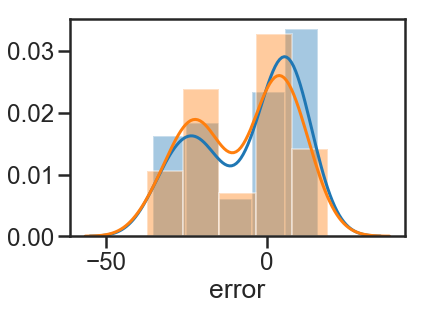

In [273]:
sns.distplot(df_tries.loc[df_tries['stimulation']=='ON', 'error'])
sns.distplot(df_tries.loc[df_tries['stimulation']=='OFF', 'error'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


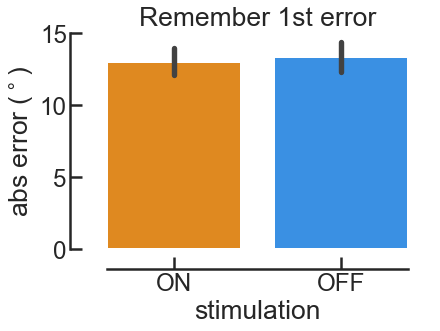

In [271]:
sns.barplot(x='stimulation', y='abs_err',order=['ON', 'OFF'], 
            palette = onoff_pal, ci=69, data=df_tries)
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 1st error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()


# sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], 
#             palette = offon_pal, hue_order=['OFF', 'ON'], ci=None, data=df_tot.loc[df_tot['order']=='1st'])
# plt.ylabel(r'% correct')
# plt.title('Remember 1st')
# plt.ylim(0.2,1)
# plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# adjust_spines(plt.gca(), ['left', 'bottom'])
# plt.legend(loc='best', frameon=False, prop={'size': 16});

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


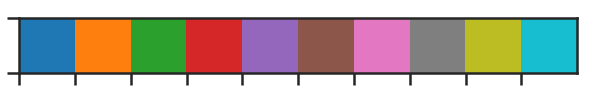

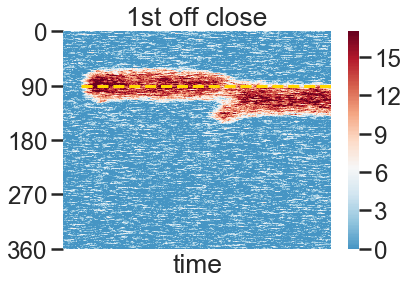

In [88]:
# 1st off close
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 



RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st off close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

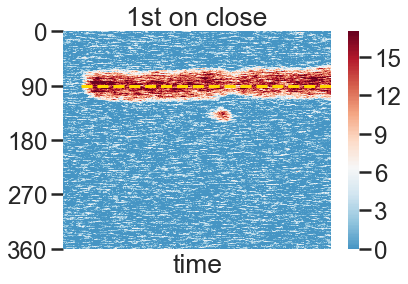

In [86]:
# 1st ON close
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 

RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st on close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

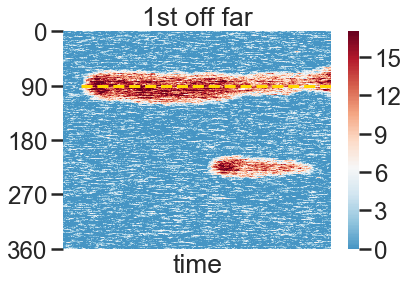

In [127]:
# 1st off far
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st off far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

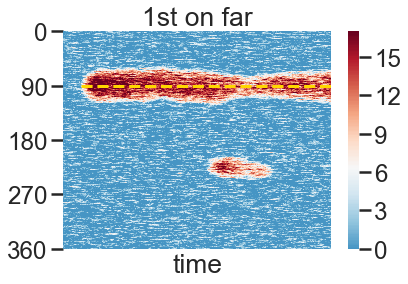

In [44]:
# 1st on far
fee=1
fei=1
fie=1
fii=1

## Example
an2 = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an2[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('1st on far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

### Remember 2nd

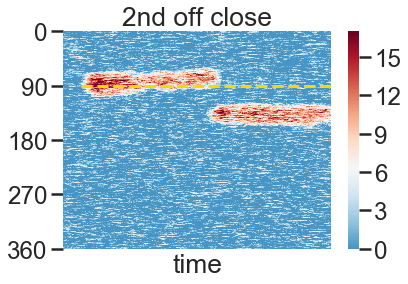

In [73]:
# 2nd off close
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 



RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd off close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

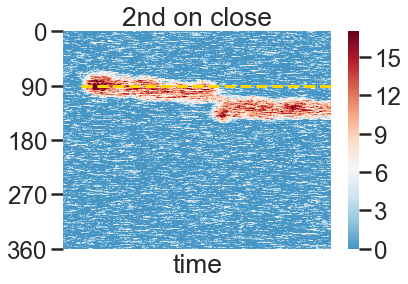

In [74]:
# 2nd ON close
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 

RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd on close')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

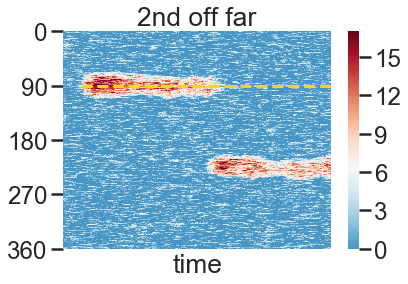

In [75]:
#2nd off far
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd off far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

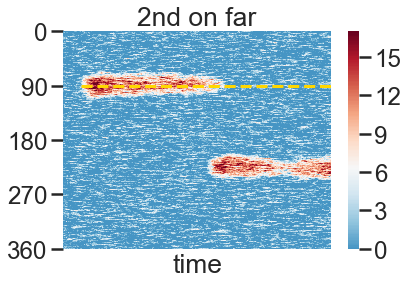

In [78]:
# 2nd on far
fee=0.94
fei=0.92
fie=1.14
fii=1.08

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=135, tauE=20, tauI=10,  n_stims=2, I0E=0.18, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 


RE_sorted=flipud(an[4])
sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.gca().set_title('2nd on far')
plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
plt.gca().set_xticks([])
plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
plt.gca().set_yticklabels(['0','90','180', '270', '360'])
plt.gca().set_xlabel('time');

## Plots

In [152]:
#1st
df_fc =pd.read_excel('remembers_first_close_51.xlsx')
df_fc.columns=['error', 'stimulation', 'distance']
df_fc['abs_err']=abs(df_fc['error'])
df_fc['performance']=df_fc['abs_err']<10
df_fc['order']='1st'

df_ff =pd.read_excel('remembers_first_I0E.xlsx')
df_ff.columns=['error', 'stimulation', 'distance']
df_ff['abs_err']=abs(df_ff['error'])
df_ff = df_ff.loc[df_ff['distance']=='far']
df_ff['performance']=df_ff['abs_err']<10
df_ff['order']='1st'

df_f=pd.concat([df_fc, df_ff])
df_f=df_f[df_f['abs_err']< df_f['abs_err'].mean() + 2*df_f['abs_err'].std()]

In [153]:
#2nd
df_s =pd.read_excel('remembers_second_I0E.xlsx')
df_s.columns=['error', 'stimulation', 'distance']
df_s['abs_err']=abs(df_s['error'])
df_s['performance']=df_s['abs_err']<10
df_s=df_s[df_s['abs_err']<  df_s['abs_err'].mean() + 2*df_s['abs_err'].std()]
df_s['order']='2nd'

In [237]:
#1st
df_f =pd.read_excel('remembers_first_I0E_del.xlsx')
df_f.columns=['error', 'stimulation', 'distance']
df_f['abs_err']=abs(df_f['error'])
df_f['performance']=df_f['abs_err']<20
df_f['order']='1st'
df_f=df_f[df_f['abs_err']< 51] #df_f['abs_err'].mean() + 2*df_f['abs_err'].std()]

In [238]:
#2nd
df_s =pd.read_excel('remembers_second_I0E_del.xlsx')
df_s.columns=['error', 'stimulation', 'distance']
df_s['abs_err']=abs(df_s['error'])
df_s['performance']=df_s['abs_err']<20
df_s['order']='2nd'
df_s=df_s[df_s['abs_err']< 51] # df_s['abs_err'].mean() + 2*df_s['abs_err'].std()]

In [239]:
df_tot=pd.concat([df_f, df_s])
#df_tot=df_tot[df_tot['abs_err']< df_tot['abs_err'].mean() + 2*df_tot['abs_err'].std()] # remove here the outliers, not cond by cond

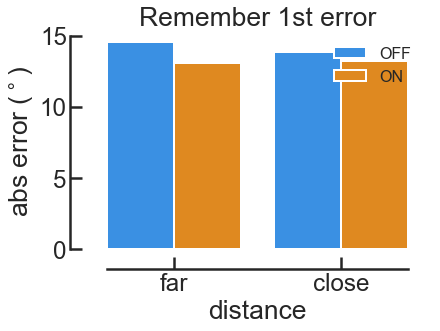

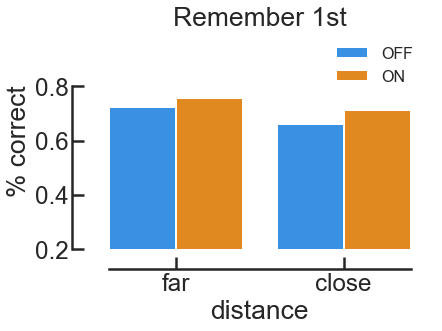

In [240]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=None, data=df_tot.loc[df_tot['order']=='1st'])
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 1st error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()


sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], 
            palette = offon_pal, hue_order=['OFF', 'ON'], ci=None, data=df_tot.loc[df_tot['order']=='1st'])
plt.ylabel(r'% correct')
plt.title('Remember 1st')
plt.ylim(0.2,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});

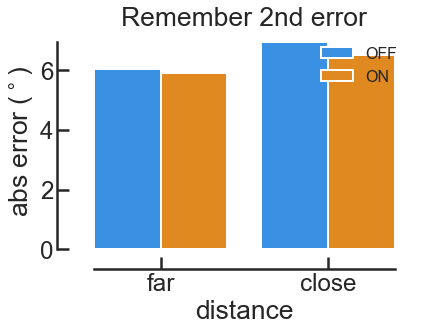

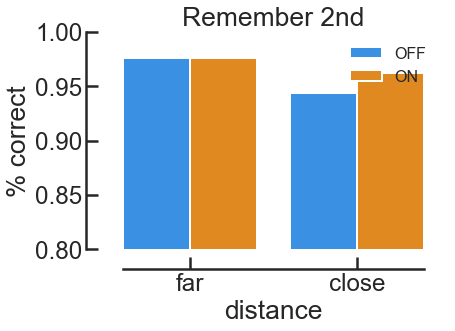

In [241]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=None, data=df_tot.loc[df_tot['order']=='2nd'])
plt.ylabel(r'abs error ($^\circ$)')
plt.title('Remember 2nd error')
#plt.ylim(12,20)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16})
plt.show(block=False)


sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=None, data=df_tot.loc[df_tot['order']=='2nd'])
plt.ylabel(r'% correct')
plt.title('Remember 2nd')
plt.ylim(0.8,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16})
plt.show(block=False)

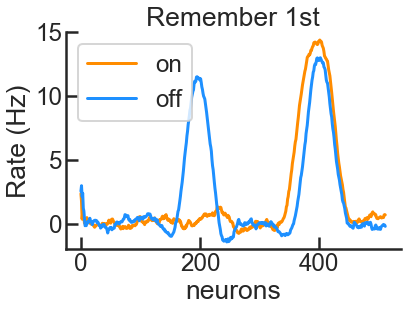

In [215]:
plt.plot(pd.DataFrame(an2[3]).rolling(window=30, min_periods=1).mean(), color=c_on,  label='on' )
plt.plot(pd.DataFrame(an[3]).rolling(window=30, min_periods=1).mean(), color= c_off, label='off' )
plt.legend()
plt.title('Remember 1st')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('Rate (Hz)')
plt.xlabel('neurons');
plt.ylim(-2,15);

In [ ]:
## Center population activity

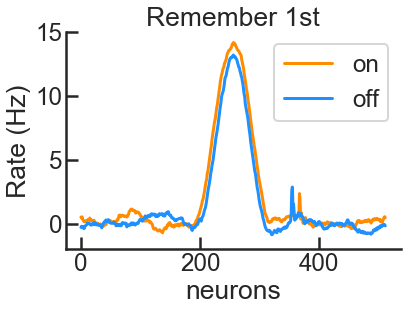

In [130]:
PA_on = pd.DataFrame(an2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)


PA_off = pd.DataFrame(an[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


plt.plot(PA_on_rolled, color=c_on,  label='on' )
plt.plot(PA_off_rolled, color= c_off, label='off' )
plt.legend()
plt.title('Remember 1st')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('Rate (Hz)')
plt.xlabel('neurons');
plt.ylim(-2,15);



## Phantom?

In [65]:
from model_phantom import *

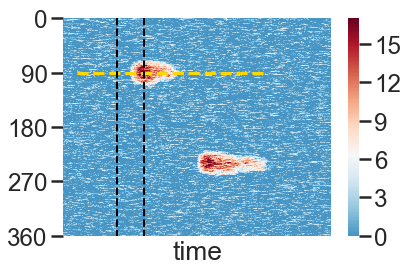

In [79]:
fee=1
fei=1
fie=1
fii=1

fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=2000, targ_onset_1=500, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=150, tauE=20, tauI=10,  n_stims=2, I0E=-2, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=-3.5, phantom_onset=400, phnatom_duration=200)


hemap(on)
plt.plot([400/2, 400/2], [0, 512], '--k', linewidth=2) ## flipped, so it is p_target 
plt.plot([600/2, 600/2], [0, 512], '--k', linewidth=2)